In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import scipy as sp
import scipy.optimize
%matplotlib inline

In [3]:
#Make an ellipse
a=2
b=1

#Find angles for equidistant points 
#(adapted from https://stackoverflow.com/questions/6972331/)
e = (1.0 - b ** 2.0 / a ** 2.0) ** 0.5
def angles_in_ellipse(num,e):
    assert(num > 0); 
    angles = 2 * np.pi * np.arange(num) / num #initial guess
    tot_size = sp.special.ellipeinc(2.0 * np.pi, e**2)
    arc_size = tot_size / num
    arcs = np.arange(num) * arc_size
    res = sp.optimize.root(
        lambda x: (sp.special.ellipeinc(x, e**2) - arcs), angles
    )
    angles = res.x 
    return angles

numstate=200
theta=angles_in_ellipse(numstate, e)

In [4]:
state=np.zeros((numstate,3))
state[:,1]=b * np.cos(theta)
state[:,0]=a*np.sin(theta)
#state=np.delete(state,0,axis=0)
#numstate=numstate-1

In [5]:
#Define phase between two states arg<q1,p1|q2,p2>
def panchaphase(state1,state2):
    (q1,p1,theta1)=state1
    (q2,p2,theta2)=state2
    rel=1/2.0*(p2*q1-q2*p1)
    rel=rel+(theta2-theta1)
    return rel
#Putting a superposition in phase
def putinphase(statearray):
    l=len(statearray)
    for i in range(l-1):
        theta=panchaphase(statearray[i],statearray[i+1])
        statearray[i+1][2]=statearray[i+1][2]-theta
    return statearray
#Define the dot product between the states <q2,p2|q1,p1>
def mydot(state2,state1):
	(q1,p1,theta1)=state1
	(q2,p2,theta2)=state2
	res=-0.25*(q1-q2)**2-0.25*(p1-p2)**2+1j/2.0*(p1*q2-p2*q1)
	res=res+1j*(theta1-theta2)
	return np.exp(res)

In [6]:
#Setting the phase part of the superposition
state=putinphase(state)

In [7]:
#Normalize the superposition
N=0
for i in range(numstate):
	for j in range(numstate):
		N=N+mydot(state[i],state[j]) 
#Actually norm is the norm squared
N=N.real
#Define the Q function
def qfunc(x,y,numstate):
	statepq= np.asarray((x,y,0))#Phase is by default zero
	temp=0
	for j in range(numstate):
		temp=temp+mydot(statepq,state[j])
	temp=np.square(np.abs(temp))/N
	temp=temp/(2.0*np.pi)
	return temp

In [8]:
npoints =300
qlim=a+2
plim=b+2
q = np.linspace(-qlim, qlim, npoints)
p = np.linspace(-plim, plim, npoints)
Q, P = np.meshgrid(q, p)# We will evaluate Q function over this grid
#Now to evaluating the q values over the desired set of points
vqfunc=np.vectorize(qfunc)
result=vqfunc(Q,P,numstate)

# Save the results in a file
filecut = 'Ellipse' 
np.savetxt(filecut+'.txt', result, fmt='%f')

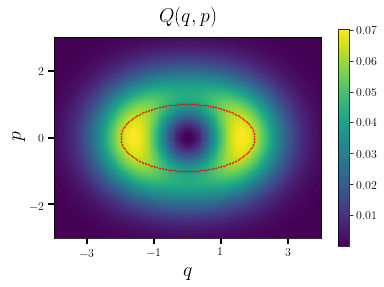

In [14]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['STIX']})
rc('text', usetex=True)
#plotting
result = np.loadtxt(filecut+'.txt', dtype=float)

# fig=plt.figure()
# cp=plt.contourf(Q, P, result,100)
# plt.colorbar(cp)
# plt.xlim([-qlim,qlim])
# plt.ylim([-plim,plim])

fig, ax = subplots()

cp=imshow(result,cmap='viridis',
          vmin=result.min(),vmax=result.max(),interpolation=None,origin='lower',
         extent=[-qlim,qlim,-plim,plim])
cb = fig.colorbar(cp)
cb.ax.tick_params(labelsize=12)
ax.tick_params(direction='out', length=6, width=2, colors='k',labelsize=12)
plt.plot(state[:,0],state[:,1],'ro',markersize=0.5)
plt.xlabel(r'$q$ ',fontsize=20)
plt.ylabel(r'$p$',fontsize=20)
ax.set_xticks([-3,-1,1,3])
ax.set_yticks([-2,0,2])
plt.title(r'$Q(q,p)$',fontsize=20,pad=15)
fig.savefig(filecut+'.pdf')
plt.show()
fig.clf()

In [10]:
qvals=np.linspace(-qlim,qlim,npoints*20)

In [11]:
check=vqfunc(qvals,0,numstate)

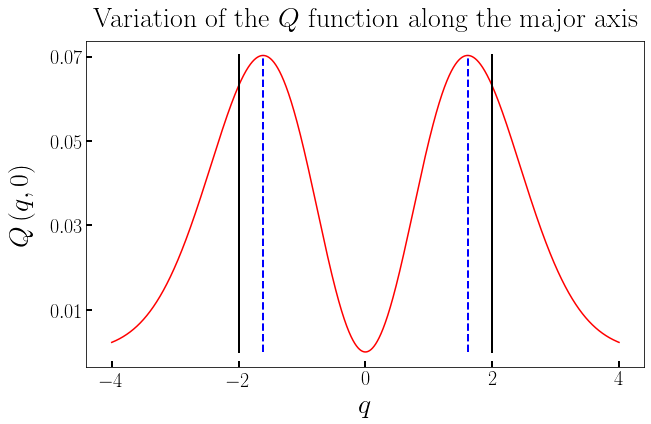

In [12]:
fig, axes = plt.subplots(figsize=(10,6))
axes.plot(qvals, check, 'r')
axes.set_xlabel(r'$q$',fontsize=28)
axes.set_ylabel(r'$Q\,(q,0)$',fontsize=28,labelpad=15)
axes.tick_params(direction='in', length=6, width=2, colors='k',labelsize=20)
axes.set_xticks([-4,-2,0,2,4])
axes.set_yticks([0.01,0.03,0.05,0.07])
axes.set_title(r'Variation of the $Q$ function along the major axis',fontsize=28,pad=15);
plot([-a, -a], [0, check.max()], color='k', linestyle='-', linewidth=2)
plot([a, a], [0, check.max()], color='k', linestyle='-', linewidth=2)
qvalmax=qvals[np.argmax(check)]
plot([-qvalmax, -qvalmax], [0, check.max()], color='b', linestyle='--', linewidth=2)
plot([qvalmax, qvalmax], [0, check.max()], color='b', linestyle='--', linewidth=2)
fig.savefig('EllipseQvalalongq.pdf',bbox_inches='tight')

In [13]:
print(qvalmax)

1.6129354892482075
